# AIML Lab
### Methodology
speech input --> translate to english --> intent classification & slot tagging --> return text output --> convert to telugu speech

### Architecture
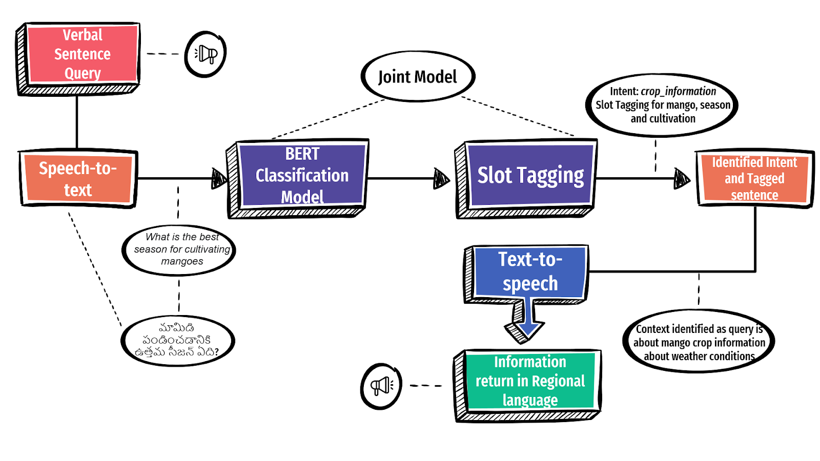

### Accessing the Dataset and Model

In [2]:
%cd "D:\CSE @ RV\VI SEM\AIML\Lab\codes\JointBERT"

D:\CSE @ RV\VI SEM\AIML\Lab\codes\JointBERT


### Installations

In [3]:
# !pip install -r requirements.txt

In [4]:
# !pip install speechrecognition
# !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# !pip install ffmpeg-python
# !pip install translate
# !pip install gTTS
# !pip install googletrans
# !pip install google-search-results

### Importing Modules

In [5]:
from IPython.display import HTML, Audio
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import speech_recognition as sr
from googletrans import Translator
import scipy
from os import path
import pandas as pd
import numpy as np
import os.path
import requests 
import pandas as pd 
from bs4 import BeautifulSoup 
from googlesearch import search
import re
from gtts import gTTS
import os
from typing_extensions import final

C:\Users\akshi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### Taking Speech Input

In [6]:
def speech_to_text():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        print("Speak to record audio in Telugu")
        audio = r.listen(source, timeout = 5)
        try:
            telugu = r.recognize_google(audio, language = "te-TE")
            translator = Translator()
            english = translator.translate(telugu).text
            print("Did you say")
            print("Telugu Input: " + telugu)
            print("English Translation: " + english)
            return english,telugu
        except Exception as e:
            print("Error: " + str(e))

### Web-Scraping

In [7]:
df = pd.read_csv('../Agriculture.csv')
data = df.iloc[:,:].values

In [8]:
def getdata(url): 
    r = requests.get(url)
    return r.text

def textScraping(link):
    count = 0
    htmldata = getdata(link) 
    soup = BeautifulSoup(htmldata, 'html.parser') 
    data =''
    t=""
    for data in soup.find_all("p"):
        t+=data.get_text()
    t = re.sub('[\n\t\r]', ' ', t)
    print(t)
    return t

def web_scraping(result, file):
    query = result
    strings=""
    finaltext=""
    for j in search(query,  lang = 'te', num=3, stop=3):
        print(j)
        strings=textScraping(j)
        list=strings.split('.')
        list=list[0:5]
        if(len(list)>3):
            for i in list:
                finaltext=finaltext+i+'.'  
            file.write(finaltext)
            print(finaltext)
        strings=''
        list=[]
    return finaltext

### Query Answer

In [9]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

from serpapi import GoogleSearch
def query_answer(query, file):
    params = {
    "engine": "google",
    "q": query,
    "api_key": "6210fdb38d42f22d34844e80603c94c695d75475eccd39b251f728c8677c496d"
    }
    with HiddenPrints():
        search = GoogleSearch(params)
        results = search.get_dict()
        organic_results = results["organic_results"]

    ans=organic_results[0].get("snippet") 
    ans3=organic_results[1].get("snippet")
    ans2=ans.split('.')
    #if(type(ans3)!=None):
    ans4=ans3.split('.')
    ans=ans2[0]+". "+ans4[0]
    #else:
    #ans=ans2[0]

    translator= Translator()
    result = translator.translate(ans, dest = "te").text
    file = open("file.txt", "w", encoding="utf-8")
    file.write(result)
    return result


### Text to Speech

In [10]:
from IPython.display import Audio
from IPython.display import display
def text_to_speech(finaltext, test = 0):
    mytext = finaltext
    language = 'te'
    myobj = gTTS(text=mytext, lang=language, slow=False)
    myobj.save("query-answer.mp3")
    #os.system("query-answer.mp3")
    if test==0:
        wn = Audio('query-answer.mp3', autoplay=True)
    if test==1:
        wn = Audio('query-answer.mp3', autoplay=False)
    display(wn)

In [11]:
def output():

    # record audio from user into audio_user.wav
    print("\033[38;5;210m\033[1m ---------------SPEECH INPUT-----------------\033[00m")
    query, speech_input = speech_to_text()
#     print("--------------------------------------------")

    # saving the converted text to txt file
    f = open("query.txt", 'w')
    query = query.replace("?","")
    f.write(query)
    f.close()

    # intent classification and slot tagging using JointBERT trained model
    print("\033[38;5;210m\033[1m---INTENT CLASSIFICATION AND SLOT TAGGING---\033[00m")
    ! python predict.py --input_file query.txt --output_file intent_slot.txt --model_dir agri_model_quads
#     print("--------------------------------------------")

    print("\033[38;5;210m\033[1m----------------MODEL OUTPUT----------------\033[00m")
    f = open("intent_slot.txt", "r+")
    for line in f:
        print(line, end='')

#     print("--------------------------------------------")

    # getting a customized answer to farmer's query
    print("\033[38;5;210m\033[1m---------------QUERY ANSWER-----------------\033[00m")
    file = open("Query-Answer.txt", "w+",encoding="utf-8")
    #print(len(converted_telugu_text))
    text_answer = query_answer(query, file)
    print(text_answer)
    text_to_speech(text_answer,0)

# Testing on Single Speech Input

In [13]:
output()

 ---------------SPEECH INPUT-----------------
Speak to record audio in Telugu
Did you say
Telugu Input: తేనెటీగల జీవిత కాలం ఎంత
English Translation: What is the life span of bees?
---INTENT CLASSIFICATION AND SLOT TAGGING---


C:\Users\akshi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
08/12/2022 11:41:22 - INFO - transformers.configuration_utils -   loading configuration file agri_model_quads\config.json
08/12/2022 11:41:22 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "JointBERT"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": "quads",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_h

----------------MODEL OUTPUT----------------
<animal_husbandry> -> What is the [life:B-animal_lifespan] [span:B-animal_lifespan] of [bees:B-animal_type]
---------------QUERY ANSWER-----------------
పని చేసే తేనెటీగల జీవిత కాలం ఐదు నుండి ఏడు వారాల వరకు ఉంటుంది. తేనెటీగ యొక్క జీవితకాలం అది తేనెటీగ రకం మీద ఆధారపడి ఉంటుంది


# Testing on Multiple Inputs

In [15]:
queries = open("query_test.txt", "r")
test_list = []
for line in queries:
    line = line.replace('\n', '')
    test_list.append(line)
print(test_list)

['when is the best time to grow mangoes', 'what is the price of tractors', 'what diseases do pigs get', 'what are the stages of irrigation', 'why too many fertilizers are bad for plants', 'what is the selling price of mangoes in India', 'what is organic farming?', 'what is the use of plough', 'which pig gives the best pork', 'is black soil good for growing crops?', 'what are the different types of fertilizers?', 'does ginger grow well in summer?']


In [16]:

# test_list=["when is the best time to grow potatoes","what is the price of tractors","what diseases do pigs get",
# "what are the stages of irrigation","why too many fertilizers are bad for plants","what is the selling price of mangoes in India",
# "is floriculture expensive","what is the use of plough","which pig gives the best pork",
# "is black soil good for growing crops","what are the different types of fertilizers","does ginger grow well in summer"]

print("\033[38;5;210m\033[1m---INTENT CLASSIFICATION AND SLOT TAGGING---\033[00m")

! python predict.py --input_file query_test.txt --output_file intent_slot_test.txt --model_dir agri_model_quads

print("\033[38;5;210m\033[1m--------------------------------------------\033[00m")

def testing():
    f = open("intent_slot_test.txt", "r+")
    i=0
    for line in f:
        print("\033[38;5;210m\033[1mTest Case \033[0m",i+1)
        print("English Query:",test_list[i])
        translator = Translator()
        result = translator.translate(test_list[i],src="en",dest="te").text
        print("Telugu Translated Query:",result)
        print(line, end='')
        print("Query Answer:", end = '')
        file = open("Query-Answer_test.txt", "w+")
        text_answer = query_answer(test_list[i], file)
        print(translator.translate(text_answer,dest="en").text)
        result = translator.translate(text_answer,src="en",dest="te").text
        print(result)
        text_to_speech(text_answer,1)
        i=i+1
        print("\033[38;5;210m\033[1m--------------------------------------------\033[00m")

testing()
  
  

---INTENT CLASSIFICATION AND SLOT TAGGING---


C:\Users\akshi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\akshi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
08/11/2022 20:19:18 - INFO - transformers.configuration_utils -   loading configuration file agri_model_quads\config.json
08/11/2022 20:19:18 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "JointBERT"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": "quads",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_h

--------------------------------------------
Test Case  1
English Query: when is the best time to grow mangoes
Telugu Translated Query: మామిడి పండించడానికి ఉత్తమ సమయం ఎప్పుడు
<crop_information> -> when is the best [time:B-crop_growth_time] to [grow:B-crop_growth_time] [mangoes:B-crop_name]
Query Answer:The best time to grow mangoes from seed is at the beginning of the wet season (beginning of summer). The best time to plant a mango tree is in spring when the weather is still mild
విత్తనం నుండి మామిడిని పెంచడానికి ఉత్తమ సమయం తడి సీజన్ ప్రారంభం (వేసవి ప్రారంభం). మామిడి చెట్టును నాటడానికి ఉత్తమ సమయం వసంత ఋతువులో వాతావరణం ఇంకా ఆనందకరమైనది


--------------------------------------------
Test Case  2
English Query: what is the price of tractors
Telugu Translated Query: ట్రాక్టర్ల ధర ఎంత
<agricultural_machinery> -> what is the [price:B-machinery_price] of [tractors:B-machinery_type]
Query Answer:Mid-size farm tractors with 25hp - 80hp typically cost between $22,700 and $49,000. Typically, they cost between $80,000 to more than $600,000 and offer many benefits
25hp - 80hp ఉన్న మిడ్-సైజ్ ఫార్మ్ ట్రాక్టర్ల ధర సాధారణంగా $22,700 నుండి $49,000 వరకు ఉంటుంది. సాధారణంగా, వాటి ధర $80,000 నుండి $600,000 కంటే ఎక్కువ మరియు అనేక ప్రయోజనాలను అందిస్తాయి.


--------------------------------------------
Test Case  3
English Query: what diseases do pigs get
Telugu Translated Query: పందులకు ఎలాంటి వ్యాధులు వస్తాయి
<animal_husbandry> -> what [diseases:B-animal_diseases] do [pigs:B-animal_type] get
Query Answer:1 Exudative dermatitis (greasy pig) · 2 Coccidiosis · 3 Respiratory diseases. Diseases associated with swine include ringworm, erysipelas, leptospirosis, streptococcosis, campylobacterosis, salmonellosis, cryptosporidiosis, giardiasis.
1 ఎక్సూడేటివ్ డెర్మటైటిస్ (జిడ్డైన పంది) · 2 కోకిడియోసిస్ · 3 శ్వాసకోశ వ్యాధులు. స్వైన్‌తో సంబంధం ఉన్న వ్యాధులలో రింగ్‌వార్మ్, ఎరిసిపెలాస్, లెప్టోస్పిరోసిస్, స్ట్రెప్టోకోకోసిస్, క్యాంపిలోబాక్టీరోసిస్, సాల్మొనెలోసిస్, క్రిప్టోస్పోరిడియోసిస్, గియార్డియాసిస్ ఉన్నాయి.


--------------------------------------------
Test Case  4
English Query: what are the stages of irrigation
Telugu Translated Query: నీటిపారుదల దశలు ఏమిటి
<agricultural_processes> -> what are the [stages:B-agricultural_process_requirement] of [irrigation:B-agricultural_process_type]
Query Answer:Management of irrigation according to growth stages; Onions, bulb formation, wilting; Tomatoes, after fruit set, wilting; Cool season grasses, early spring, early fall. In the first phase, the irrigated area nearly tripled, mainly due to the government's investment in irrigation schemes due to the significant increase in the reservoir.
వృద్ధి దశల ప్రకారం నీటిపారుదల నిర్వహణ; ఉల్లిపాయలు, బల్బ్ ఏర్పడటం, విల్టింగ్; టమోటాలు, పండు సెట్ తర్వాత, విల్టింగ్ ; చల్లని సీజన్ గడ్డి, ప్రారంభ వసంత, ప్రారంభ పతనం . మొదటి దశలో, నీటిపారుదల విస్తీర్ణం దాదాపు మూడు రెట్లు పెరిగింది, ప్రధానంగా నీటిపారుదలలో ప్రభుత్వ పెట్టుబడి కారణంగా రిజర్వాయర్ పెరిగింది.


--------------------------------------------
Test Case  5
English Query: why too many fertilizers are bad for plants
Telugu Translated Query: చాలా ఎరువులు మొక్కలకు ఎందుకు చెడ్డవి
<agrochemicals> -> why too many [fertilizers:B-agrochemical_type] are [bad:B-agrochemical_disadv] for plants
Query Answer:When applying fertilizer, always read and follow all label directions carefully - over fertilization can permanently damage trees and plants. Too much fertilizer (applying too often or too much) can burn or dry out the roots, eventually killing the plant.
మందులు వేసేటప్పుడు, ఎల్లప్పుడూ అన్ని లేబుల్ సూచనలను జాగ్రత్తగా చదవండి మరియు అనుసరించండి - ఎక్కువ ఫలదీకరణం చెట్లు మరియు మొక్కలను శాశ్వతంగా దెబ్బతీస్తుంది. చాలా ఎక్కువ మందులు (చాలా తరచుగా లేదా చాలా తరచుగా వర్తింపజేయడం) మూలాలను కాల్చవచ్చు లేదా ఎండబెట్టవచ్చు, చివరికి మొక్కను చంపుతుంది


--------------------------------------------
Test Case  6
English Query: what is the selling price of mangoes in India
Telugu Translated Query: భారతదేశంలో మామిడి పండ్ల విక్రయ ధర ఎంత
<crop_information> -> what is the [selling:B-crop_selling_price] [price:B-crop_name] of [mangoes:B-crop_name] in India
Query Answer:Alphonso Mango, Rs. 150/dozen, Rs. 950/dozen; Alphonso Mango, Rs. 25/kg, Rs. 275/kg; Kesar Mango, Rs. 40/kg, Rs. 180/kg; Malda Mango, Rs. 20/kg, Rs. 100/kg; Totapuri In 2022, India's mango prices range between US$1
అల్ఫోన్సో మామిడి, రూ. 150/డజన్, రూ. 950/డజన్ ; అల్ఫోన్సో మామిడి, రూ. 25/కేజీ, రూ. 275/కేజీ; కేసర్ మామిడి, రూ. 40/కేజీ, రూ. 180/కేజీ; మాల్దా మామిడి, రూ. 20/కేజీ, రూ. 100/కేజీ; తోతాపురి . 2022లో, భారతదేశ మామిడిపండ్ల ధరల పరిధి US$1 మధ్య ఉంటుంది


--------------------------------------------
Test Case  7
English Query: what is organic farming?
Telugu Translated Query: సేంద్రీయ వ్యవసాయం అంటే ఏమిటి?
<alternative_farming_methods> -> what is [organic:B-method_type] farming?
Query Answer:The USDA defines organic agriculture as "a production system that responds to site-specific conditions by integrating cultural, biological and . . . organically grown" foods.
USDA సేంద్రీయ వ్యవసాయాన్ని "సాంస్కృతిక, జీవసంబంధమైన మరియు . "సేంద్రీయంగా పండించిన" ఆహారాన్ని ఏకీకృతం చేయడం ద్వారా సైట్-నిర్దిష్ట పరిస్థితులకు ప్రతిస్పందించే ఉత్పత్తి వ్యవస్థగా నిర్వహించబడింది.


--------------------------------------------
Test Case  8
English Query: what is the use of plough
Telugu Translated Query: నాగలి యొక్క ఉపయోగం ఏమిటి
<agricultural_machinery> -> what is the [use:B-machinery_agricultural_process] of [plough:B-machinery_type]
Query Answer:The main purpose of plowing is to turn the topsoil, bringing fresh nutrients to the surface while burying weeds and crop residues. A plow is one of the agricultural tools and is used for initial soil cultivation in preparation for sowing seed or loosening or turning the soil for planting.
దున్నడం యొక్క ప్రధాన ఉద్దేశ్యం, కలుపు మొక్కలు మరియు పంట అవశేషాలను పాతిపెట్టేటప్పుడు తాజా పోషకాలను అందించడం, పైభాగంలోని మట్టిని తిప్పడం. నాగలి అనేది వ్యవసాయ సాధనాలలో ఒకటి మరియు విత్తనం విత్తడానికి లేదా నేలను వదులుకోవడానికి లేదా తిప్పడానికి నాటడానికి ప్రారంభ నేల సాగు కోసం ఉపయోగిస్తారు.


--------------------------------------------
Test Case  9
English Query: which pig gives the best pork
Telugu Translated Query: ఏ పంది ఉత్తమ పంది మాంసాన్ని ఇస్తుంది
<animal_husbandry> -> which [pig:B-animal_type] [gives:B-animal_byproduct] the best [pork:B-animal_byproduct]
Query Answer:What are the best pig breeds for meat? · Yorkshire Pigs · Duroc Pigs · Berkshire Pigs · Meishan Pigs · Landrace Pigs · Chester White Pigs · Hampshire Pigs · Pietrain . 1
మాంసం కోసం ఉత్తమ పంది జాతులు ఏమిటి? · యార్క్‌షైర్ పందులు · డ్యూరోక్ పిగ్స్ · బెర్క్‌షైర్ పిగ్స్ · మీషాన్ పిగ్స్ · ల్యాండ్‌రేస్ పిగ్స్ · చెస్టర్ వైట్ పిగ్స్ · హ్యాంప్‌షైర్ పిగ్స్ · పీట్రెయిన్ . 1


--------------------------------------------
Test Case  10
English Query: is black soil good for growing crops?
Telugu Translated Query: పంటలు పండించడానికి నల్ల నేల మంచిదా?
<agricultural_processes> -> is [black:B-land_soil_type] [soil:B-land_soil_type] [good:B-agricultural_process_adv] for [growing:B-agriculture_process_duration] crops?
Query Answer:Black soil is rich in calcium, potassium and magnesium, but low in nitrogen content. There are many reasons why soil may turn black
నల్ల నేలలో కాల్షియం, పొటాషియం మరియు మెగ్నీషియం పుష్కలంగా ఉన్నాయి, కానీ తక్కువ నైట్రోజన్ కంటెంట్ కలిగి ఉంటుంది. అనేక కారణాలు నేల నల్లగా మారవచ్చు


--------------------------------------------
Test Case  11
English Query: what are the different types of fertilizers?
Telugu Translated Query: వివిధ రకాల ఎరువులు ఏమిటి?
<agrochemicals> -> what are the different types of [fertilizers?:B-agrochemical_type]
Query Answer:Organic and inorganic fertilizers. This includes nitrogen fertilizers, phosphate fertilizers, potash fertilizers, micronutrient fertilizers and compound fertilizers etc.
సేంద్రీయ మరియు అకర్బన మందులు. ఇందులో నత్రజని పదార్థాలు, ఫాస్‌ఫేట్‌ పదార్థాలు, పొటాష్‌ పదార్థాలు, సూక్ష్మపోషక మందులు మరియు మిశ్రమ రసాయనాలు మొదలైనవి ఉన్నాయి.


--------------------------------------------
Test Case  12
English Query: does ginger grow well in summer?
Telugu Translated Query: వేసవిలో అల్లం బాగా పెరుగుతుందా?
<crop_information> -> does [ginger:B-crop_name] [grow:B-crop_growth_time] well in summer?
Query Answer:Ginger planting is ideally done in late spring or early summer, but can also be done indoors in late winter or early spring. Many varieties of ginger can tolerate winters down to 20F (-6C), but none can tolerate frozen soil.
అల్లం నాటడం అనేది వసంత ఋతువు చివరిలో లేదా వేసవి ప్రారంభంలో ఆదర్శంగా జరుగుతుంది, కానీ శీతాకాలం చివరిలో లేదా వసంత ఋతువులో ఇంటి లోపల కూడా జరుగుతుంది. అనేక రకాల అల్లం శీతాకాలంలో 20F (-6C) వరకు తట్టుకోలేవు, కానీ ఏదీ గడ్డకట్టిన మట్టిని తట్టుకోలేవు.


--------------------------------------------
